# Bayes by Backprop

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp

tfk = tf.keras
tfkl = tfk.layers 
tfd = tfp.distributions
tfpl = tfp.layers

print("Tensorflow Version: %s" % tf.__version__)
print("Tensorflow Probability Version: %s" % tfp.__version__)

if tf.test.gpu_device_name() != '/device:GPU:0':
    print('GPU device not found. Using CPU')
else:
    print('Found GPU: {}'.format(tf.test.gpu_device_name()))

Tensorflow Version: 2.0.0-beta1
Tensorflow Probability Version: 0.8.0-dev20190619
Found GPU: /device:GPU:0


In [2]:
# load commons and models module
import os
import sys
import importlib

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import commons as cm
import models 
importlib.reload(cm)
importlib.reload(models)

Tensorflow Version: 2.0.0-beta1
Tensorflow Probability Version: 0.8.0-dev20190619
Found GPU: /device:GPU:0
Tensorflow Version: 2.0.0-beta1
Tensorflow Probability Version: 0.8.0-dev20190619
Found GPU: /device:GPU:0


<module 'models' from 'D:\\Tom\\Documents\\gitworkspace\\master\\ml-probability\\bayesian_nlp\\models.py'>

# Configuration, Parameters and Setup

In [3]:
# Only needs to be run once per enviroment. Downloads requiered wordnet package for nltk 
cm.one_time_setup()

# Also make sure to have access to the pretrained GloVe embedding model.
# We use glove.6B.zip from https://nlp.stanford.edu/projects/glove/

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tom\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# Directory containing the GloVe files.
glove_dir = "D:/google drive/haw/master/mastertheisis/hauptprojekt/glove"

# Directory containing the trained model
models_dir = "D:/google drive/haw/master/mastertheisis/hauptprojekt/training/models"

# Directory containing the training history
history_dir = "D:/google drive/haw/master/mastertheisis/hauptprojekt/training/history"

# Embedding dimension (all models are pretrained for dimension 50)
embedding_dim = 50

# Fraction of the dataset to be used as training_data
dataset_sizes=[0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.005]
trainingset_proportion = dataset_sizes[0]

# batch size for training
batch_size = 128

# training epochs 
epochs = 50

# hidden layers where each element denotes the number of neurons
neurons_hidden_layers = [64, 64, 32]

# variational layer implementation 
variational_layer = [
    tfpl.DenseFlipout,
    tfpl.DenseReparameterization
][0]

In [5]:
setup = cm.setup(glove_dir=glove_dir,
                 embedding_dim=embedding_dim,
                 trainingset_proportion=trainingset_proportion)
(x_train, x_train_padded, y_train) = setup["train"]
(x_test, x_test_padded, y_test) = setup["test"]
word_index = setup["word_index"]

# number of data points
N = x_train.shape[0]

Found 400000 word vectors.
17361/88587 unknown words


# Model

In [6]:
bayes_by_backprop_model = models.BayesByBackpropModel(model_setup=setup,
                                                      models_dir=models_dir,
                                                      history_dir=history_dir,
                                                      variational_layer=variational_layer,
                                                      neurons_hidden_layers=neurons_hidden_layers)

In [7]:
bayes_by_backprop_model.keras_summary()

Model: "bayes_by_backprop_DenseFlipout_24909_64_64_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 50)          4429400   
_________________________________________________________________
dense_flipout (DenseFlipout) (None, 1000, 64)          6464      
_________________________________________________________________
dense_flipout_1 (DenseFlipou (None, 1000, 64)          8256      
_________________________________________________________________
dense_flipout_2 (DenseFlipou (None, 1000, 32)          4128      
_________________________________________________________________
flatten (Flatten)            (None, 32000)             0         
_________________________________________________________________
dense_flipout_3 (DenseFlipou (None, 1)                 64001     
Total params: 4,512,249
Trainable params: 82,849
Non-trainable params: 4,429,400
______

In [11]:
bayes_by_backprop_model.fit(epochs=epochs, batch_size=batch_size)

using saved model
Loaded history successfully. Last epoch: 50
Train on 23750 samples, validate on 1250 samples


# History

In [8]:
(history_df, last_epoch) = bayes_by_backprop_model.load_history()

Loaded history successfully. Last epoch: 50


# Tests

In [9]:
model = bayes_by_backprop_model.load_model()
loss, accuracy, *other = model.evaluate(x_test_padded, y_test)
print("Test loss: %.2f\nTest accuracy: %.2f%%" % (loss, accuracy * 100))

using saved model
22419/22419 [==============================] - 17s 751us/sample - loss: 1.0471 - acc: 0.8339 - true_negatives: 9524.0000 - false_negatives: 2070.0000 - true_positives: 9171.0000 - false_positives: 1654.0000 - precision: 0.8472 - recall: 0.8159 - kl: 0.2361
Test loss: 1.05
Test accuracy: 83.39%


using saved model
<START> the gun is probably the worst film i've ever saw the comedians direction is very poor the dialogs sounds like they were written by a 13 year old teenager the plot what plot is another suspense in which it is very hard to get into finally nothing in this movie is any good a big thumbs down to everyone involved and particularly to the montreal film festival who presented this movie in competition


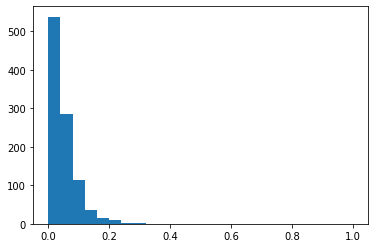

<START> with its ww2 timing falling in and out of love and easy on the eye kira this is re atonement br br this a relationship story with focused main characters working out the the balance between first and fast love in the home front of ww2 poet dylan thomas his way between wife and ex in dark and smoky blitz london and later in windy wales br br vera's ex and next spark off each other as the poet and soldier become a sideline while the girls bond and share an easy watch that works well in the era bouncing along with just a few dips in pace would work well with french subtitles but then i may have been to too many art house movies lately


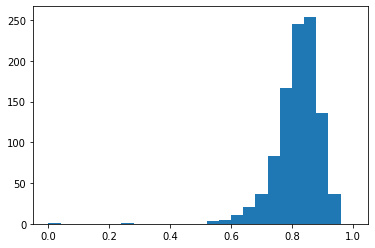

<START> pure crap decent cinematography i liked some of colors other than that this was one of the worst movies i ever saw boring lifeless not once did i find myself interested in any of the characters i kept waiting for a real plot to form and the movie to pick up the pace nothing ever happened i think they spent too much time working on hair and wardrobe that they forgot there was a movie being made at the time


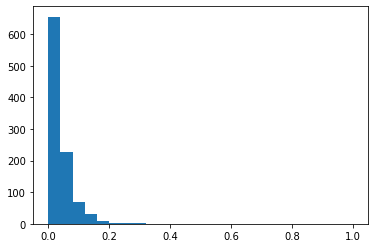

<START> murder by numbers is a pretty good movie even though the plot rolls along at a snail's pace what with sandra bullock's character getting all mixed up with her partner and the movie flashing back to a previous trauma situation she had been in it does succeed in keeping the viewer involved in the film br br having said that i do think that it does a good job in setting that eerie sort of who done it type atmosphere it keeps you guessing at which one of the boys really was behind the murder if not both of them i think ryan gosling and that other kid lol do a good job of selling that bully versus dork relationship not sure about gosling playing a bad ass but for a guy who would later star in a movie like the notebook he did a pretty good job once the movie gets rolling though i really found myself involved in the story sort of asking myself oh my god what would i do if i were in that situation like i said a good csi type movie maybe not for the extreme crime drama movie junkie but 

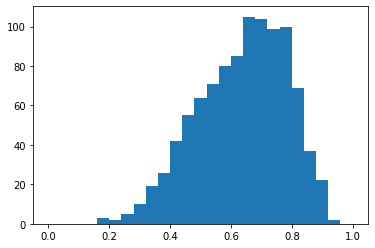

<START> like many others i had been attracted to the combination of pollack ford and scott thomas i had enjoyed the work of pollack and ford on sabrina a well made film and a careful rewrite of the old material on hearing that this film was in production i ordered and read the book immediately it seemed that this would be a more difficult story to film the characters are not always sympathetic there is little if any humor and the author makes numerous plot shortcuts to focus on his principal theme that since each would see the other as the only one sharing the unique combination of loss and betrayal brought on by the air crash the completely surprised spouses would seek each other out moreover he imagines that resolution could come to both through a bitter exploration of the hidden lives and that this experience of thick and thin could yield a deeper love than each had previously although much of the book deals with their bitterness and their building hatred of their former partners in

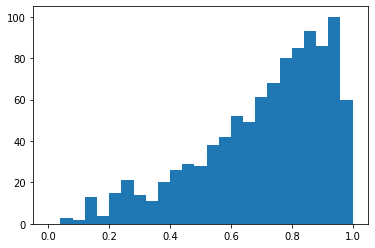

<START> this film would be particularly fun for anyone who has been in the film industry especially in any indie capacity those whose inheritance includes a film introduction may not appreciate it quite as much i am hard to please in the documentary category this doc is different though its pleasure comes from an earthy realism of indie filmmaker punks who are a hoot to be around and watch whether you've ever wondered what it is like to be in films in front of or behind the camera or whether you have worked your way through the sometimes painful and hard but rewarding indie world you'll certainly get a kick out of this film


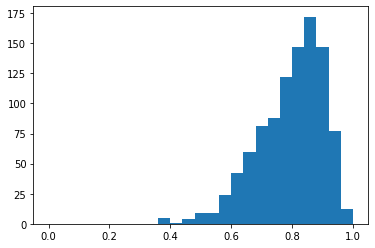

<START> from the fertile imagination which brought you the irresistible hercules 1983 comes its even more preposterous read goofier sequel right off the bat we get another unwieldy beginning of time prologue which even contrives to completely contradict these same events as set up in the first film a condensed montage of highlights from same is soon followed by a superman like scrolling credits sequence narrative wise here we have four rebellious gods who steal seven all important but poorly animated  a crime which for one thing sets the moon careening on a collision course with planet earth faster than you can say nepotism zeus once again played as a white haired bearded man by the relatively young claudio cassinelli sends his champion  who has now rightfully taken his place among the elite thanks to one presumes the almighty tasks performed in the first film  to find his blooming and avert the calamities in store br br no sooner has hercules lou ferrigno  as if you didn't know to

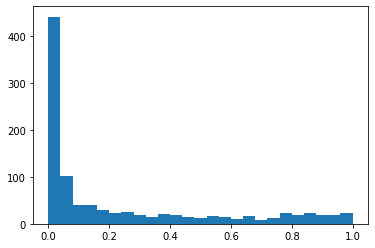

<START> this movie has the feel of a college project over it who wants to do a blair witch project meets saw theme but it isn't successful the cinematography is poor and the acting even more so the characters in my opinion doesn't come off as being credible at all the editing of the film isn't really working as intended either there are a lot of poor effects which i believe are put in there to try and add a horrid effect but to me it just gives me a feeling of indifference br br i would stay away from this movie unless you are a dedicated movie freak who likes to watch different and indie horror movies however i believe this movie is not worth watching for the average person you will get no pleasure out of the poor effects and the handycam feel which this movie on it's viewers


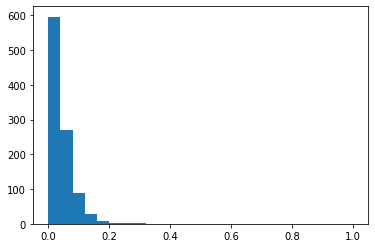

<START> a post apocalyptic warrior goes off to save some kind of nun and on the way meets some cyber punks on skates who want to kick his ass this is one of the hardest to watch films ever there are scenes with silence that seems to last hours before somebody comes out with the next badly written badly acted line there are action sequences that keep repeating and we're not talking the 1 2 3 action repeat on a particularly good kick that was made popular by eastern directors we're talking many many repeats of long bad fight sequences this is incredibly confusing at first but then quickly becomes annoying as you're watching a 30 second sequence for the 2nd 3rd and 4th time any kind of plot or vision is lost within the confusing continuity the only thing thats keeps this film in the apart from the bet from a friend that i couldn't watch it all the way through without begging for it to be turned off and disposed off safely so it may harm no one else is the fact that although painful this f

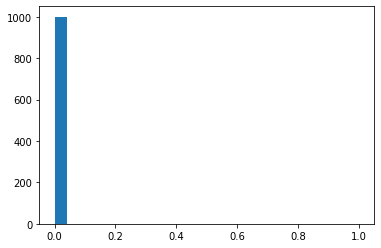

<START> 8 days no script that's what the dvd tells you is how the movie was made it's shot in blurry video that's occasionally used to good effect but it's really partially naked women sitting around in a room for most of the running time it is very well acted and this helps a lot but the killer only shows up once in a long time and the girls women sit and mope they don't try to escape or do anything too interesting so the whole thing grinds to a stand still after about 20 minutes would have been a good short maybe even powerful even for eight days they do very little why because they had no script how many movies have been made without scripts not too many i wonder why that is how many great movies have been made from bad scripts not too many why is that working against this major problem the direction tries and does some interesting things but with what is essentially nothing topless girls shot in dark grainy colorless video sitting around will keep some going for a while but not for

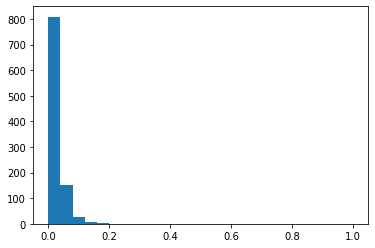

<START> i was very impressed with the latest production from mick as a fan of his i was used to a different kind of humour than displayed here he wisely opted with a more subtle broad style of comedy in crackerjack rather than his usual low brow in your face ramblings it is at times inconsistent and un even but a decent script works past that and makes for some entertaining viewing directed by paul moloney who has directed almost every australian tv series imaginable crackerjack tells the story of jack simpson a bloke that belongs to his local bowls club for the sole reason of parking when the club hits financial trouble he is forced to bowl in an attempt to raise the funds to save the club from becoming a poker machine haven a familiar and successful formula that is handled well there is no denying that the film owes it's success to the great casting of he seemed to have a great rapport with samuel johnson and excellent chemistry with judith lucy and while the character is probably no

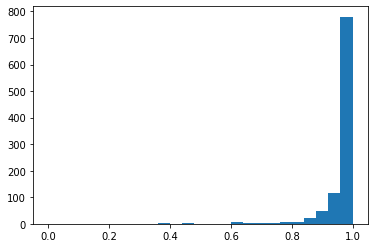

<START> they are hunted and starving they are completely and yet they press on through sheer inertia this film tries to answer the question how far will human beings go to survive hopelessness emanates from every of this film and like so many japanese films of this time it condemns the blind military loyalty that pressed the japanese people into war


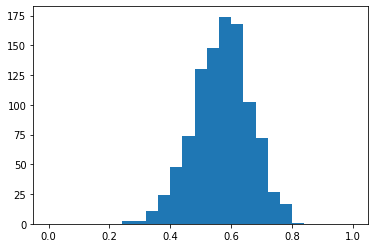

<START> the description of the mood of the movie may be considered as a spoiler because there is not much action in fact br br great one br br is it for my peculiar interest for the and is it for the atmosphere of the movie or is there some more magic if yes it is for sure the utmost human one br br this film is no doubt extremely artistic artificial depends on taste i can imagine most of the people who hate to watch slow movies and those of tsai ming liang who i didn't enjoy other times are one of the slowest that i know suffering during the movie yes people are unable to slow down and to let time pass and to watch it without feeling they waste it one can take this piece as torture or as a therapy br br the topic at the surface the lack of communication even if we live in rabbit cages one next to each other but not really together people are tired sick of something and unable to describe it just don't want to meet touch talk confront the others like if they had disappeared the big blo

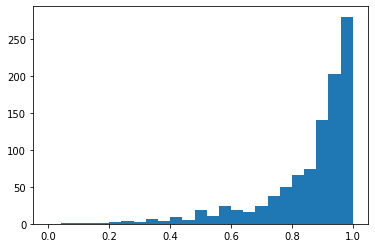

<START> this movie was made 20 years before my time its introduction of john garfield in the supporting role of mickey borden makes it a classic he slumps onto the screen and your eyes are glued garfield was an original and his portrayal of whipping boy is a must see


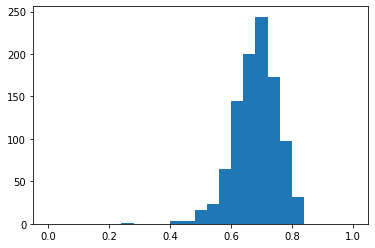

<START> spoilers spoilers the cell 2000 out of four br br do you believe there is a part of yourself deep inside in your mind with things you don't want other people to see during a session when i'm inside i get to see those things br br catherine deane br br and so do we one of the most visually stimulating films of the year the cell is a love hate movie either you love it or you hate it i can understand the reasons some people dislike this production with a story that combines disturbing serial killers with mind probing the cell is too much for some viewers others will not understand the complex actions and emotions of the film i think it's one of the year's most engrossing films br br making his feature film screenwriting debut mark creates an imaginative world of rich colorful images and provocative characters the filmmakers take advantage of every shot conceived ideas for the cell in 1993 when he decided to combine two of his major interests mind probing and serial killers he was 

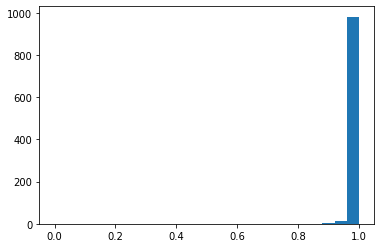

<START> a group of adventurers travel to the 'dark to try and locate a lost heiress named diana who disappeared years before in a plane crash and who is now believed to be living with a savage tribe that consider her to be their goddess br br once again my search for sleazy european cannibal movies has taken me deep into jess franco seemingly endless cinematic wilderness swarming with sub par scriptwriting crawling with crap camera work and abundant with awful acting franco regular lina taking the prize this time for her pitiful performance as an ailing elderly woman it is here in this hellish place that i finally stumbled upon diamonds of an abysmal jungle based exploitationer so stupefyingly bad that it took me three successive evenings to finish watching it br br tawdry and unrelentingly dull even by franco's standards this wearisome piece of trash fails on almost every level the story is a dreadfully dull derivative of edgar rice burrough's tarzan albeit with a feminine twist the f

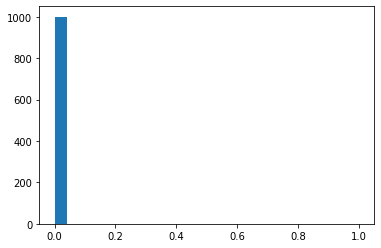

<START> wow i haven't seen a movie this bad since fire down below wait that's a seagal movie too like on deadly ground and fire down below seagal centers the movie around his environmental awareness message and how the military fbi and cia are incompetent idiots problem is that both reality and a sensible plot are secondary to whatever social commentary seagal is trying to get across


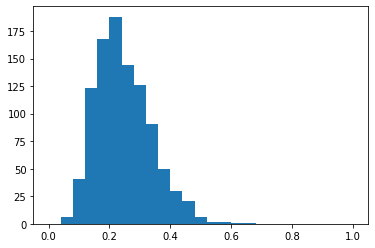

<START> when does the hurting stop that's what i said somewhere between the beginning and that other part of the movie that really sucked this film nearly sapped all the life out of me and i have sat through some really bad movies coming from a true puppet master fan i would expect to hear myself say this but it's true the plot is inane the special effects awful the sound track the most infernal i have ever heard oh i almost forgot about the acting it was so bad that i forgot it was there at all nuff said the only redeeming factor in the film is the puppets themselves they truly are the stars and could out act all but guy rolfe himself he is the puppetmaster and although you can see their wires and strings they carry me throughout the painful start to finish of retro puppet master in closing is for true fanatics who happen to be masochists br br roach br br


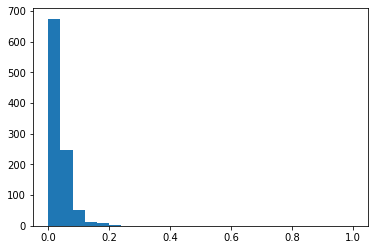

<START> i was fortunate enough to be an extra in this movie when i was about 13 during the roller rink scenes my junior high school drama class was invited to participate it was a fantastic experience br br gary busey charles martin smith and don stroud played the music live all day as a musician i can appreciate the tireless work and dedication these guys put in to their roles they must have played those songs 20 times it's very difficult to maintain consistency and energy under those conditions this is visible during a cut to a close up on that'll be the day but fortunately the unsuspecting public probably wouldn't have picked it up br br skating around all day getting the day off from school and being transported back in time was a incredible thrill i also had my first date on film i had to walk a girl up to the ticket booth woo hoo even with an out of date haircut and hot lights melting the vaseline in my hair it was still worth it fun stuff br br the movie is top notch and is high

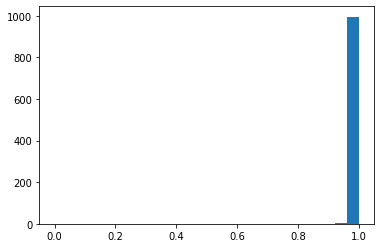

<START> the film makers went well out of their way to find only the following demographics palestinians that have the appearance of peace loving solution seeking good will palestinians particularly older women and families with children who are especially inconvenienced by the security fence and israelis that don't believe in the security fence sympathize heavily with its alleged effect on palestinians and consider it unnecessarily divisive and or a waste of money oh yes they do put in one member of the israeli government that does support the fence but they do what they can to portray him as inhumane and uncaring and ask him very leading questions that are really statements e g the wall is bad for the environment it is destroying everything br br i have no problem with any well most of this being presented in the movie however much i may disagree with the people they interview their opinions are valid enough for a documentary however there are at least two sides to the issue of israel

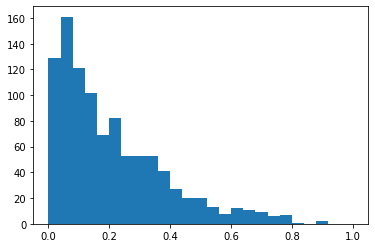

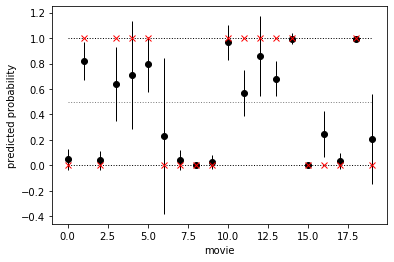

In [13]:
model = bayes_by_backprop_model.load_model()
n = 20
samples = 1000

y_pred = [model.predict(x_test_padded[:n]) for i in range(samples)]
y_pred = np.array(y_pred)

preds = [y_pred[:, i] for i in range(n)]
means = [np.mean(pred) for pred in preds]
stddevs = [np.std(pred) for pred in preds]

for i in range(n):
    sentence = word_index.vec2sentence(x_test[i])
    print(sentence)
    plt.hist(preds[i], bins=25, range=(0,1))
    plt.show()
cm.plot_confidence(means, stddevs, y_test[:n])

In [ ]:
for metric in ["acc", "loss", "recall", "precision", "kl"] :
    cm.plot_metric(metric, history_df)
    plt.show()